<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-6/K-Means%20Clustering/Lecture_6_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arya Fridayana GAstiadi

1103210082

Lecture 6 K-Means Clustering Mall Customers

Chat GPT :https://chat.openai.com/share/f48472cf-7d31-4359-bd29-3c1e942b00ea

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Path file dataset di Google Drive
file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# Membaca  dataset sebagai DataFrame
df = pd.read_csv(file_path)

# Menampilkan informasi atau contoh data dari DataFrame
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Preprocessing

Drop kolom CustomerID

In [15]:
# Menghapus kolom 'CustomerID' secara in-place
df.drop('CustomerID', axis=1, inplace=True)

# Menampilkan beberapa baris pertama untuk memeriksa
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
# Mengganti nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan beberapa baris pertama untuk memeriksa perubahan
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
# Encode Gender menjadi numerik
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

#Menentukan Jumlah Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

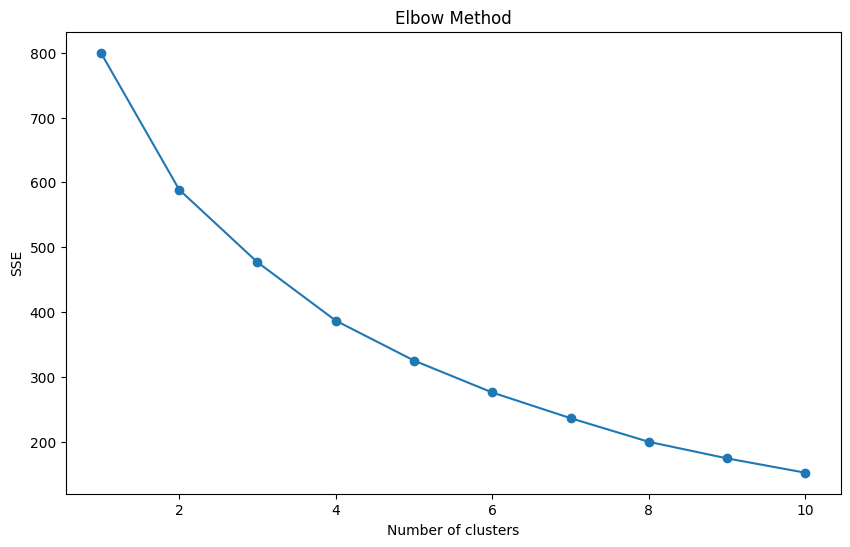

In [19]:
# Menggunakan metode Elbow untuk menentukan k jumlah cluster yang optimal
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE untuk setiap nilai k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#Clustering

In [20]:
# Melakukan K-means clustering dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Menambahkan cluster label ke dalam DataFrame
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Analisis Hasil

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        0
1       1   21                  15                      81        0
2       0   20                  16                       6        1
3       0   23                  16                      77        0
4       0   31                  17                      40        1


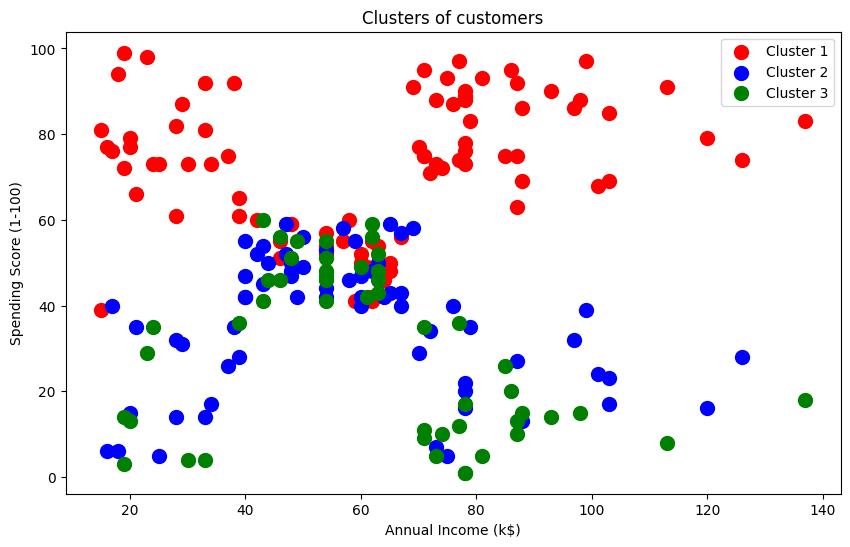

In [21]:
# Menampilkan hasil clustering
print(df.head())

# Visualisasi hasil clustering (pilih dua fitur untuk visualisasi, misalnya Income dan Spending Score)
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'][df.Cluster == 0], df['Spending Score (1-100)'][df.Cluster == 0], s=100, c='red', label='Cluster 1')
plt.scatter(df['Annual Income (k$)'][df.Cluster == 1], df['Spending Score (1-100)'][df.Cluster == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df['Annual Income (k$)'][df.Cluster == 2], df['Spending Score (1-100)'][df.Cluster == 2], s=100, c='green', label='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()